# Attacks and mitigations
**... on model with 40 hidden-layer trunk**

#### `Authors`
```
Mina Remeli
Dorottya Futóné Papp 
Szilvia Lestyán 
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Trunk Activation Attack

In [99]:
df = pd.read_csv("MDY_trunk.csv")

In [3]:
df.head()

,num_samples,n_estimators,rounds,input_size,hidden_sizes,middle_dropout,last_dropout,weight_decay,last_non_linearity,middle_non_linearity,...,batch_size,model_avg_auc_pr,model_avg_logloss,TN,FP,FN,TP,accuracy,precision,recall
0,500,100,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,1298,0.708428,0.670894,92,73,59,106,0.600000,0.592179,0.642424
1,500,100,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,1298,0.708428,0.670894,96,69,57,108,0.618182,0.610169,0.654545
2,500,100,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,1298,0.708428,0.670894,94,71,56,109,0.615152,0.605556,0.660606
3,500,100,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,1298,0.708428,0.670894,97,68,52,113,0.636364,0.624309,0.684848
4,500,100,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,1298,0.708428,0.670894,89,76,52,113,0.612121,0.597884,0.684848


In [4]:
df.accuracy.mean()

0.6198333333333333

In [5]:
df.precision.mean()

0.6078369265229285

In [6]:
df.recall.mean()

0.675939393939394

# Trunk Activation tanh

In [7]:
df_t = pd.read_csv("MDY_trunk_tanh.csv")

In [8]:
df_t.accuracy.mean()

0.6044090909090909

In [9]:
df_t.precision.mean()

0.5999901498976663

In [10]:
df_t.recall.mean()

0.6264242424242424

# Trunk randsub

In [11]:
df = pd.read_csv("MDY_trunk_randsub.csv")

In [12]:
df.compression_parameter.value_counts()

0.6    50
0.8    50
0.4    50
0.2    50
Name: compression_parameter, dtype: int64

In [13]:
gb = df.groupby('compression_parameter')

In [14]:
gb.accuracy.mean()

compression_parameter
0.2    0.604242
0.4    0.574364
0.6    0.610364
0.8    0.595212
Name: accuracy, dtype: float64

In [15]:
gb.model_avg_auc_pr.mean()

compression_parameter
0.2    0.543137
0.4    0.535449
0.6    0.552856
0.8    0.555435
Name: model_avg_auc_pr, dtype: float64

<AxesSubplot:title={'center':'Effect of Random Subset on Trunk Activation Attack accuracy.'}, xlabel='compression_parameter', ylabel='accuracy'>

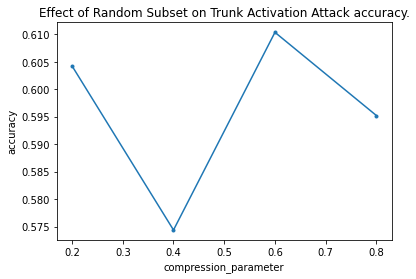

In [16]:
gb.accuracy.mean().plot(title="Effect of Random Subset on Trunk Activation Attack accuracy.", ylabel="accuracy", marker=".")

# Trunk topk

In [17]:
df = pd.read_csv("MDY_trunk_topk.csv")

In [18]:
df.compression_parameter.value_counts()

0.6    50
0.8    50
0.4    50
0.2    50
Name: compression_parameter, dtype: int64

In [19]:
gb = df.groupby('compression_parameter')

In [20]:
gb.accuracy.mean()

compression_parameter
0.2    0.586242
0.4    0.571273
0.6    0.562788
0.8    0.553333
Name: accuracy, dtype: float64

In [21]:
gb.model_avg_auc_pr.mean()

compression_parameter
0.2    0.551446
0.4    0.558435
0.6    0.552744
0.8    0.551044
Name: model_avg_auc_pr, dtype: float64

<AxesSubplot:title={'center':'Effect of Top-K on Trunk Activation Attack accuracy.'}, xlabel='compression_parameter', ylabel='accuracy'>

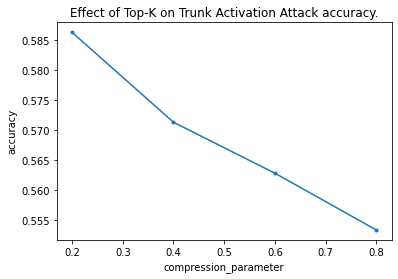

In [22]:
gb.accuracy.mean().plot(title="Effect of Top-K on Trunk Activation Attack accuracy.", ylabel="accuracy", marker=".")

# Trunk quantize

In [23]:
df = pd.read_csv("MDY_trunk_quantize.csv")

In [24]:
df.accuracy.mean()

0.5817575757575757

In [25]:
df.model_avg_auc_pr.mean()

0.528776012747572

# Trunk thresholding

In [26]:
df = pd.read_csv("MDY_trunk_threshold.csv")

In [27]:
df.accuracy.mean()

0.5401818181818182

In [28]:
df.model_avg_auc_pr.mean()

0.7341512329855887

# NGMA attack

In [29]:
df2 = pd.read_csv("MDY_NGMA.csv")

In [30]:
df2.head()

,num_samples,voting_threshold,rounds,input_size,hidden_sizes,middle_dropout,last_dropout,weight_decay,last_non_linearity,middle_non_linearity,...,batch_size,model_avg_auc_pr,model_avg_logloss,TN,FP,FN,TP,accuracy,precision,recall
0,50,0.5,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,1298,0.707780,0.669408,29,21,0,50,0.79,0.704225,1.0
1,50,0.5,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,1298,0.707918,0.670682,38,12,0,50,0.88,0.806452,1.0
2,50,0.5,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,1298,0.707626,0.670056,25,25,0,50,0.75,0.666667,1.0
3,50,0.5,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,1298,0.707670,0.670010,36,14,0,50,0.86,0.781250,1.0
4,50,0.5,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,1298,0.707375,0.668180,37,13,0,50,0.87,0.793651,1.0


In [31]:
df2.accuracy.mean()

0.8240500000000001

In [32]:
df2.precision.mean()

0.7416865085678737

In [33]:
df2.recall.mean()

1.0

In [34]:
df2.model_avg_auc_pr.mean()

0.707781250498164

# NGMA tanh

In [35]:
df2_t = pd.read_csv("MDY_NGMA_trunk.csv")

In [36]:
df2_t.accuracy.mean()

0.8240999999999999

In [37]:
df2_t.precision.mean()

0.7417368103787387

In [38]:
df2_t.recall.mean()

1.0

# NGMA dropout

In [2]:
df = pd.read_csv("MDY_NGMA_dropout.csv")

In [3]:
df.first_dropout.value_counts()

0.6    50
0.8    50
0.4    50
0.2    50
Name: first_dropout, dtype: int64

In [4]:
gb = df.groupby('first_dropout')

In [5]:
gb.accuracy.mean()

first_dropout
0.2    0.8278
0.4    0.7794
0.6    0.6482
0.8    0.5126
Name: accuracy, dtype: float64

In [6]:
gb.model_avg_auc_pr.mean()

first_dropout
0.2    0.705610
0.4    0.700000
0.6    0.692736
0.8    0.681384
Name: model_avg_auc_pr, dtype: float64

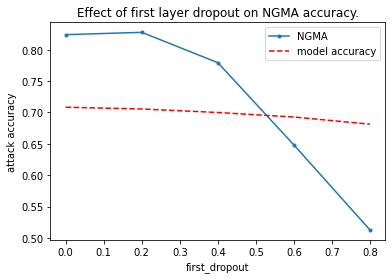

In [12]:
gb.accuracy.mean().append(pd.Series([0.8241], index=[0.0])).sort_index().plot(title="Effect of first layer dropout on NGMA accuracy.", ylabel="attack accuracy", marker=".", xlabel="first_dropout", label="NGMA")
gb.model_avg_auc_pr.mean().append(pd.Series([0.7084], index=[0.0])).sort_index().plot(linestyle='dashed', color='red', label="model accuracy")
plt.legend()

# NGMA randsub

In [45]:
df = pd.read_csv("MDY_NGMA_randsub.csv")

In [46]:
df.compression_parameter.value_counts()

0.6    50
0.8    50
0.4    50
0.2    50
Name: compression_parameter, dtype: int64

In [47]:
gb = df.groupby('compression_parameter')

In [48]:
gb.accuracy.mean()

compression_parameter
0.2    0.5000
0.4    0.5000
0.6    0.5002
0.8    0.5954
Name: accuracy, dtype: float64

In [49]:
gb.model_avg_auc_pr.mean()

compression_parameter
0.2    0.546124
0.4    0.539782
0.6    0.555676
0.8    0.557920
Name: model_avg_auc_pr, dtype: float64

<AxesSubplot:title={'center':'Effect of Random Subset on NGMA accuracy.'}, xlabel='compression_parameter', ylabel='accuracy'>

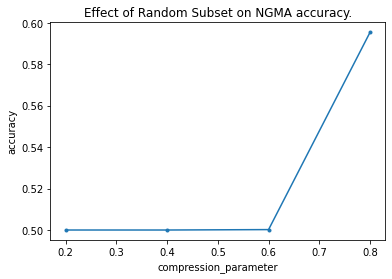

In [50]:
gb.accuracy.mean().plot(title="Effect of Random Subset on NGMA accuracy.", ylabel="accuracy", marker=".")

# NGMA Top-K

In [51]:
df = pd.read_csv("MDY_NGMA_topk.csv")

In [52]:
df.compression_parameter.value_counts()

0.2    51
0.6    50
0.8    50
0.4    50
Name: compression_parameter, dtype: int64

In [53]:
gb = df.groupby('compression_parameter')

In [54]:
gb.accuracy.mean()

compression_parameter
0.2    0.505686
0.4    0.517600
0.6    0.579800
0.8    0.662800
Name: accuracy, dtype: float64

In [55]:
gb.model_avg_auc_pr.mean()

compression_parameter
0.2    0.552626
0.4    0.558576
0.6    0.552908
0.8    0.551135
Name: model_avg_auc_pr, dtype: float64

<AxesSubplot:title={'center':'Effect of Top-K on NGMA accuracy.'}, xlabel='compression_parameter', ylabel='accuracy'>

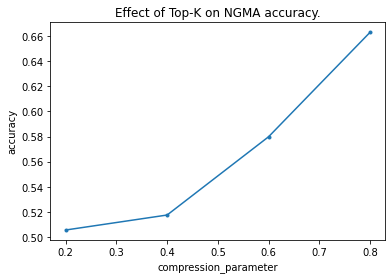

In [56]:
gb.accuracy.mean().plot(title="Effect of Top-K on NGMA accuracy.", ylabel="accuracy", marker=".")

# NGMA quantize

In [57]:
df = pd.read_csv("MDY_NGMA_quantize.csv")

In [58]:
df.accuracy.mean()

0.5

In [59]:
df.model_avg_auc_pr.mean()

0.5282061029440204

# NGMA thresholding

In [60]:
df = pd.read_csv("MDY_NGMA_threshold.csv")

In [61]:
df.accuracy.mean()

0.5

In [62]:
df.model_avg_auc_pr.mean()

0.7341512329855887

# Leaving (N-1) attack

In [63]:
df3 = pd.read_csv("MDY_Leaving.csv")

In [64]:
df3.head()

,num_epochs,voting_threshold,rounds,input_size,hidden_sizes,middle_dropout,last_dropout,weight_decay,last_non_linearity,middle_non_linearity,...,input_size_freq,uncertainty_weights,seed,output_size,batch_size,model_avg_auc_pr,model_avg_logloss,pos_epochs_together,pos_epochs_left,p
0,30,0.2,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,32000,False,1,309,1298,0.704169,0.668107,26,0,5.599666e-27
1,30,0.2,1000,32000,[40],0.2,0.2,0.000001,relu,relu,...,32000,False,2,309,1298,0.703898,0.667788,0,0,1.000000e+00


# Top-K

In [83]:
df_trunk = pd.read_csv("MDY_trunk_topk.csv")
df_NGMA = pd.read_csv("MDY_NGMA_topk.csv")

In [84]:
gb_trunk = df_trunk.groupby('compression_parameter')
gb_NGMA = df_NGMA.groupby('compression_parameter')

In [90]:
trunk_accuracy = gb_trunk.accuracy.mean()
NGMA_accuracy = gb_NGMA.accuracy.mean()
model_accuracy = gb_NGMA.model_avg_auc_pr.mean()

frame = {'NGMA': NGMA_accuracy, 'TrunkActivationAttack': trunk_accuracy, 'model accuracy': model_accuracy}

result = pd.DataFrame(frame)

In [91]:
result

,NGMA,TrunkActivationAttack,model accuracy
compression_parameter,,,
0.2,0.505686,0.586242,0.552626
0.4,0.517600,0.571273,0.558576
0.6,0.579800,0.562788,0.552908
0.8,0.662800,0.553333,0.551135


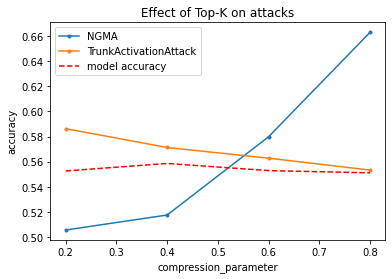

In [97]:
plt.figure()

result.NGMA.plot(marker=".")
result.TrunkActivationAttack.plot(marker='.')
result['model accuracy'].plot(linestyle='dashed', color='red')

plt.title('Effect of Top-K on attacks')
plt.ylabel('accuracy')
plt.legend()

# NGMA batch size

In [13]:
df_NGMA = pd.read_csv("MDY_NGMA_batch_ratio.csv")

In [14]:
df_NGMA.head()

,num_samples,voting_threshold,rounds,input_size,batch_ratio,hidden_sizes,first_dropout,middle_dropout,last_dropout,weight_decay,...,seed,model_avg_auc_pr,model_avg_logloss,TN,FP,FN,TP,accuracy,precision,recall
0,50,0.5,1000,32000,0.04,[40],0.0,0.2,0.2,0.000001,...,0,0.706139,0.667416,11,39,0,50,0.61,0.561798,1.0
1,50,0.5,1000,32000,0.04,[40],0.0,0.2,0.2,0.000001,...,1,0.706113,0.667510,22,28,0,50,0.72,0.641026,1.0
2,50,0.5,1000,32000,0.04,[40],0.0,0.2,0.2,0.000001,...,2,0.705671,0.666114,16,34,0,50,0.66,0.595238,1.0
3,50,0.5,1000,32000,0.04,[40],0.0,0.2,0.2,0.000001,...,3,0.705992,0.668636,15,35,0,50,0.65,0.588235,1.0
4,50,0.5,1000,32000,0.04,[40],0.0,0.2,0.2,0.000001,...,4,0.705464,0.667209,15,35,0,50,0.65,0.588235,1.0


In [15]:
df_NGMA.batch_ratio.value_counts()

0.06    50
0.08    50
0.10    50
0.04    50
Name: batch_ratio, dtype: int64

In [16]:
gb = df_NGMA.groupby('batch_ratio')

In [17]:
NGMA_accuracy = gb.accuracy.mean()

In [18]:
NGMA_accuracy

batch_ratio
0.04    0.6426
0.06    0.5470
0.08    0.5230
0.10    0.5548
Name: accuracy, dtype: float64

In [19]:
NGMA_accuracy = NGMA_accuracy.append(pd.Series([0.8241], index=[0.02])).sort_index()

In [20]:
NGMA_accuracy.head(4)

0.02    0.8241
0.04    0.6426
0.06    0.5470
0.08    0.5230
dtype: float64

Text(0.5, 0, 'ratio of samples used in a mini-batch')

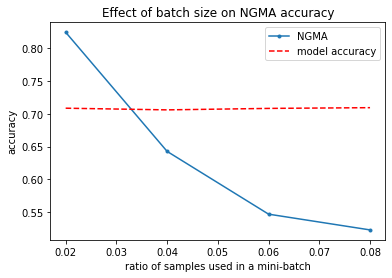

In [25]:
plt.figure()

NGMA_accuracy.head(4).plot(marker=".", label="NGMA")
gb.model_avg_auc_pr.mean().append(pd.Series([0.7084], index=[0.02])).sort_index().head(4).plot(linestyle='dashed', color='red', label="model accuracy")
plt.legend()

plt.title('Effect of batch size on NGMA accuracy')
plt.ylabel('accuracy')
plt.xlabel('ratio of samples used in a mini-batch')